This code reads in a CSV file and searches for rows (i.e., articles) that contain all of the specified search terms in the specified columns. If an article is found to contain all of the search terms in the specified columns, the information for that article is printed to the console and added to a new Excel workbook as a new row. The Excel workbook is then saved to a file.

Here is a brief overview of what the code does:

1. Imports the csv and openpyxl modules, which are used to read in the CSV file and create an Excel workbook, respectively.
2. Defines a function search_articles that takes in three arguments: data, search_terms, and search_columns. data is a list of dictionaries, where each dictionary represents a row in the CSV file and the keys in the dictionary are the column names. search_terms is a list of search terms that we want to find in the specified columns. search_columns is a list of column names that we want to search for the search terms.
3. The function creates a new workbook and sheet using openpyxl.
4. The function iterates over the data list and for each item in the list (i.e., each row in the CSV file), it iterates over the search_terms list. For each search term, it checks if the search term is found in all of the specified search_columns for that row. If the search term is found in all of the specified columns, the information for that row is printed to the console and added to the sheet as a new row.
5. After all rows have been processed, the function prints the total number of topics found and saves the workbook to a file.
6. The code prompts the user to enter the name of a CSV file and tries to open and read the data from the file. If the file is not found or if an error occurs while reading the file, an error message is printed.
7. The code prompts the user to enter the search terms and splits the input string into a list of search terms.
8. The code specifies the columns to search and calls the search_articles function with the data from the CSV file, the list of search terms, and the list of search columns as arguments. If an error occurs while searching for articles, an error message is printed.

Step 1: For saving the excel file at a specific location, edit the line 41 'workbook.save('C:\\Users\\abdul\\Desktop\\workspace\\data\\Railways.xlsx')' by replacing it with the path and name of your choice
Step 2: In the .csv file, open and make sure that the columns with these names are present:
        A) Topic
        B) Title
        C) Publication Year
        D) Author
        E) Abstract Note
        F) DOI
    
    If not then change the names above according to the .csv file you have in line 14, 64 accordingly. If still the problem persists, email me at abdulmunimtahir@gmail.com
Step 3: Hit 'Shift+Enter' to run the code
Step 4: Enter the path of the csv file with .csv at the end e.g. C:\Users\abdul\Desktop\workspace\data\Railways\Railway.csv
Step 5: Enter the search words e.g. Railway water pollution

In [ ]:
import csv
import openpyxl


def search_articles(data, search_terms, search_columns):
    topic_num = 1
    index_number = 0
    
    # Create a new workbook and sheet
    workbook = openpyxl.Workbook()
    sheet = workbook.active
    
    # Add the column titles
    sheet.append(['Topic', 'Title', 'Publication Year', 'Author', 'Abstract Note', 'DOI'])
    
    # Iterate over the data in the CSV file
    for i, item in enumerate(data):
        # Iterate over the search terms
        for search_term in search_terms:
            # Initialize a flag to track whether the search term is found in all specified columns
            found_in_all_columns = True
            # Iterate over the specified columns
            for column in search_columns:
                # Check if the search term is in the current column
                if search_term not in item[column]:
                    found_in_all_columns = False
                    break
            # If the search term is found in all specified columns, write the information to the sheet and print it
            if found_in_all_columns:
                print("Topic {}: {}".format(topic_num, item['Title']))
                print("Publication Year: {}".format(item['Publication Year']))
                print("Authors: {}".format(item['Author']))
                print("Abstract Note: {}".format(item['Abstract Note']))
                print("DOI: {}".format(item['DOI']))
                sheet.append([topic_num, item['Title'], item['Publication Year'], item['Author'], item['Abstract Note'], item['DOI']])
                topic_num += 1
                index_number = index_number+1
    
    print('Total number of topics found are: ', index_number)
    # Save the workbook to a file
    workbook.save('C:\\Users\\abdul\\Desktop\\workspace\\data\\Railways\\Railway_water_pollution_environmental_risk_assessment.xlsx')


# Prompt the user to enter the name of a CSV file
fname = input('Enter CSV file name with .csv:')

# Try to open the file and read the data
try:
    with open(fname, 'r', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        data = []
        for row in reader:
            data.append(row)
except FileNotFoundError:
    print('File not found:', fname)
except:
    print('An error occurred while reading the file:', fname)

# Prompt the user to enter the search terms
sname = input('Enter Search words seperated by space:')
search_terms = sname.split()

# Specify the columns to search
search_columns = ['Title', 'Automatic Tags', 'Abstract Note']

# Search for articles that contain the search terms in the specified columns
try:
    search_articles(data, search_terms, search_columns)
except:
    print('An error occurred while searching for articles')

Code for creating Process table with '+' and '-' according to processes present

In [ ]:
import csv
from bs4 import BeautifulSoup
from jinja2 import Environment, FileSystemLoader
import webbrowser
from jinja2 import Template


# Open and read the file
with open('processes.csv', 'r') as file:
    reader = csv.DictReader(file)
    data = [row for row in reader]

# Get the unique articles and authors from the data
articles = list(set([row['Article'] for row in data]))
authors = list(set([author for row in data for author in row['Authors'].split('/')]))

# Create the table with the columns "Processes" and the formatted authors' names
table = {f"{row['Authors'].split('/')[0].split()[-1]} et al., ({row['Publication Year']})": {'Processes': []} for row in data}





# Add the processes to the table
processes = []
for row in data:
    for process in row['Processes'].split('/'):
        if process not in processes:
            processes.append(process)
        if process not in table[f"{row['Authors'].split('/')[0].split()[-1]} et al., ({row['Publication Year']})"]['Processes']:
            table[f"{row['Authors'].split('/')[0].split()[-1]} et al., ({row['Publication Year']})"]['Processes'].append(process)

# Add the "+" or "-" to the table based on the presence of the process
for author in table:
    for process in processes:
        if process in table[author]['Processes']:
            table[author][process] = '+'
        else:
            table[author][process] = '-'

# Define the template as a string variable
template_string = """
<!DOCTYPE html>
<html>
<head>
  <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css" integrity="sha384-JcKb8q3iqJ61gNV9KGb8thSsNjpSL0n8PARn9HuZOnIxN0hoP+VmmDGMN5t9UJ0Z" crossorigin="anonymous">
  <style>
    table {
      border-collapse: collapse;
    }
    th, td {
      border: 1px solid #ddd;
      padding: 8px;
    }
    th {
      background-color: #f2f2f2;
    }
  </style>
</head>
<body>
  <table class="table table-striped">
    <thead>
      <tr>
        <th>Author</th>
        {% for process in processes %}
          <th>{{ process }}</th>
        {% endfor %}
      </tr>
    </thead>
    <tbody>
      {% for author, details in table.items() %}
        <tr>
          <td>{{ author }}</td>
          {% for process in processes %}
            <td>{{ details.get(process, '-') }}</td>
          {% endfor %}
        </tr>
      {% endfor %}
    </tbody>
  </table>
</body>
</html>

"""

# Create the HTML table using the template string
template = Template(template_string)
html_table = template.render(table=table, processes=processes)

# Save the HTML table as an HTML file
with open("processes_discription.html", "w") as file:
    file.write(html_table)

# Open the HTML file in the default web browser
webbrowser.open("processes.html", new=2)

The code is doing the following steps:

1. It first imports the necessary libraries, including the csv library for reading in data from a CSV file, the traceback library for handling exceptions, and the Network library from pyvis for creating a network graph.

2. The code defines a function called "search_articles" which takes in two arguments: "data" which is the data from the CSV file, and "search_terms" which is a list of terms that the user wants to search for within the data.

3. The function then initializes several lists to store the data from each column of the CSV file, such as articles, authors, dimensions, times, maths, processes, dois, and urls.

4. The function then iterates over the data in the CSV file and extracts the data from each column, storing it in the appropriate list.

5. The function then creates a Network object called G, which is used to create the network graph. It also specifies some options for the graph such as physics, nodes and edges

6. The function then iterates over the search terms provided by the user. For each search term, it then iterates over the articles in the data and checks if the search term appears in the title of the article or in any of the author, dimension, time, math, process, DOI, or URL fields.

7. If a search term is found in the title of an article or in any of the author, dimension, time, math, process, DOI or URL fields, the function prints the article title, along with all the authors, dimensions, time, math, process, DOI, and URL associated with that article.

8. The function then adds nodes and edges to the network graph for each of the search terms, articles, authors, dimensions, times, maths, processes, DOI and URL.

9. The function then connects the search term to the article, and connects the article to the authors, dimensions, times, maths, processes, DOI, and URL in the graph

10. Finally, the function renders the graph in a Jupyter notebook with specified options for physics, nodes and edges.

This code is user-friendly because the user can simply provide a list of search terms that they want to search for within the data, and the code will handle the rest, including extracting the data from the CSV file, searching for the specified search terms, and creating a network graph of the results. The user can also customize the graph options according to their preference.

In [ ]:
import csv
import traceback
from pyvis.network import Network
from selenium import webdriver

def search_articles(data, search_terms):
    topic_num = 1
    index_number = 0
    # Create lists to store the data from each column
    articles = []
    authors = []
    dimensions = []
    times = []
    maths = []
    processes = []
    dois = []
    urls = []

    # Iterate over the data in the CSV file and extract the data from each column
    for i, item in enumerate(data):
        articles.append(item[0])
        authors.append(item[1].split('/'))
        dimensions.append(item[2].split(','))
        times.append(item[3].split(','))
        maths.append(item[4].split(','))
        processes.append(item[5].split('/'))
        dois.append(item[6])
        urls.append(item[7])

    G = Network(notebook=True, height="1000px", width="2000px")
    G.options = {
        "physics": {
            "solver": "barnesHut",
            "label_outside": False,
            "label_position": "center",
            "repulsion": 50000,
            "label_align": "center"
        },
        "nodes": {
            "shape": "dot",
            "font": {
                "size": 15
            }
        }
    }



    # Iterate over the search terms
    for search_term in search_terms:
        for i, item in enumerate(articles):
            if item.lower() == search_term.lower() or search_term.lower() in [x.lower() for x in authors[i]]  or search_term.lower() in [x.lower() for x in dimensions[i]] or search_term.lower() in [x.lower() for x in times[i]] or search_term.lower() in [x.lower() for x in maths[i]] or search_term.lower() in [x.lower() for x in processes[i]]:
                print("Topic {}: {}".format(topic_num, item))
                print("Authors: {}".format(authors[i]))
                print("Dimensions: {}".format(dimensions[i]))
                print("Time: {}".format(times[i]))
                print("Maths: {}".format(maths[i]))
                print("Processes: {}".format(processes[i]))
                print("DOI: {}".format(dois[i]))
                print("URL: {}".format(urls[i]))
                topic_num += 1
                index_number = index_number+1
                # Add nodes for the search term, article, authors, dimensions, times, maths, processes, DOI, and URL
                G.add_node(search_term, label=search_term, color='red', size =10)
                G.add_node(item, label=item, color='green')
                for author in authors[i]:
                    G.add_node(author, label=author, color='blue')
                for dimension in dimensions[i]:
                    G.add_node(dimension, label=dimension, color='yellow')
                for time in times[i]:
                    G.add_node(time, label=time, color='pink')
                for math in maths[i]:
                    G.add_node(math, label=math,color='purple')
                for process in processes[i]:
                    G.add_node(process, label=process, color='orange')
                G.add_node(dois[i], label=dois[i], color='grey')
                G.add_node(urls[i], label=urls[i], color='black')

                # Connect the search term to the article
                G.add_edge(search_term, item)

                # Connect the article to the authors, dimensions, times, maths, processes, DOI, and URL
                for author in authors[i]:
                    G.add_edge(item, author)
                for dimension in dimensions[i]:
                    G.add_edge(item, dimension)
                for time in times[i]:
                    G.add_edge(item, time)
                for math in maths[i]:
                    G.add_edge(item, math)
                for process in processes[i]:
                    G.add_edge(item, process)
                G.add_edge(item, dois[i])
                G.add_edge(item, urls[i])
    print('Total number of topics found are: ', index_number)
    G.show("Citation_Network.html")
    



    
# Prompt the user to enter the name of an csv file
fname = input('Enter csv file name with .csv:')

# Try to open the file and read the data
try:
    with open(fname) as file:
        reader = csv.reader(file)
        next(reader)
        data = list(reader)
    
except FileNotFoundError:
    print('File not found:', fname)
except:
    print('An error occurred while reading the file:', fname)

# Prompt the user to enter the search terms
sname = input('Enter Search words seperated by space:')
search_terms = sname.split()

# Search for articles that contain the search terms
try:
    search_articles(data, search_terms)
except:
    traceback.print_exc()

Code for showing all information in your CSV file in the form of a table

In [ ]:
import csv
import traceback
import pandas as pd

def search_articles(data, search_terms):
    topic_num = 1
    index_number = 0
    # Create lists to store the data from each column
    articles = []
    authors = []
    dimensions = []
    times = []
    maths = []
    processes = []
    dois = []
    urls = []

    # Iterate over the data in the CSV file and extract the data from each column
    for i, item in enumerate(data):
        articles.append(item[0])
        authors.append(item[1].split('/'))
        dimensions.append(item[2].split(','))
        times.append(item[3].split(','))
        maths.append(item[4].split(','))
        processes.append(item[5].split('/'))
        dois.append(item[6])
        urls.append(item[7])


# Create a dictionary to store the data
    results = {'Topic': [], 'Article': [], 'Authors': [], 'Dimensions': [], 'Time': [], 'Maths': [], 'Processes': [], 'DOI': [], 'URL': []}
    # set to keep track of articles that have already been added to the results
    added_articles = set()
    
    for search_term in search_terms:
        for i, item in enumerate(articles):
            if item.lower() == search_term.lower() or search_term.lower() in [x.lower() for x in authors[i]]  or search_term.lower() in [x.lower() for x in dimensions[i]] or search_term.lower() in [x.lower() for x in times[i]] or search_term.lower() in [x.lower() for x in maths[i]] or search_term.lower() in [x.lower() for x in processes[i]]:
                if item not in added_articles:
                    results['Topic'].append(topic_num)
                    results['Article'].append(item)
                    results['Authors'].append(', '.join(authors[i]).replace("[","").replace("]",""))
                    results['Dimensions'].append(', '.join(dimensions[i]).replace("[","").replace("]",""))
                    results['Time'].append(', '.join(times[i]).replace("[","").replace("]",""))
                    results['Maths'].append(', '.join(maths[i]).replace("[","").replace("]",""))
                    results['Processes'].append(', '.join(processes[i]).replace("[","").replace("]",""))
                    results['DOI'].append(dois[i])
                    results['URL'].append(urls[i])
                    added_articles.add(item)
                    topic_num += 1
                    index_number = index_number+1

    pd.set_option('display.width', 1000)
    pd.set_option('display.max_columns', None)
    # Create a DataFrame from the dictionary
    df = pd.DataFrame(results)
    # Convert the DataFrame to an HTML table
    html_table = df.to_html(index=False)
    # Define the CSS styles
    css_styles = """
        <style>
            table {
                font-family: arial, sans-serif;
                border-collapse: collapse;
                width: 100%;
            }

            td, th {
                border: 1px solid #dddddd;
                text-align: left;
                padding: 8px;
            }

            tr:nth-child(even) {
                background-color: #dddddd;
            }
        </style>
    """
    # Open a file and write the HTML table to it
    with open("process_table.html", "w") as f:
        f.write(css_styles + html_table)
    print('HTML table saved to "table.html"')
    print('Total number of topics found are: ', index_number)


# Prompt the user to enter the name of an csv file
fname = input('Enter csv file name with .csv:')

# Try to open the file and read the data
try:
    with open(fname) as file:
        reader = csv.reader(file)
        next(reader)
        data = list(reader)
    
except FileNotFoundError:
    print('File not found:', fname)
except:
    print('An error occurred while reading the file:', fname)

# Prompt the user to enter the search terms
articles = []
with open(fname) as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    data = [row for row in reader]
    for item in data:
        articles.append(item[0])

sname = input('Enter Search words seperated by space:')
if sname.lower() == "all":
    search_terms = articles  # pass all articles to the function
else:
    search_terms = sname.split()

# Search for articles that contain the search terms
try:
    search_articles(data, search_terms)
except:
    traceback.print_exc()

Publication year 3-D graph.

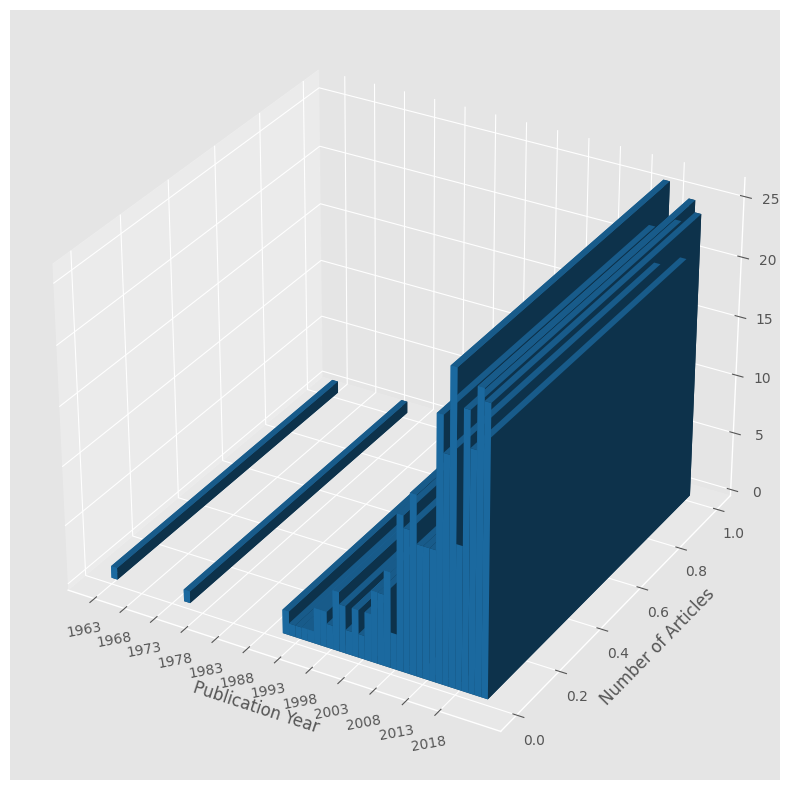

In [3]:
import csv
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('ggplot') # to use different styles for the graph
from mpl_toolkits.mplot3d import Axes3D

publication_years = []

with open("C:/Users/abdul/Desktop/workspace/publication.csv", newline='', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        if csv_reader.line_num == 1:
            continue
        publication_year = row[2] # extract the value
        if not publication_year or int(publication_year) < 1963: # check if the value is empty or before 1963
            continue # skip this row
        publication_years.append(int(publication_year))


# use collections.Counter to count the occurrences of each publication year
year_count = Counter(publication_years)

# sort the count by year
year_count = dict(sorted(year_count.items()))


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(list(year_count.keys()), [0]*len(year_count), [0]*len(year_count), 1, 1, list(year_count.values()), color='#1f77b4')
ax.set_xticks(list(year_count.keys()))
ax.set_xticklabels(list(year_count.keys()))
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of Articles")
plt.xticks(rotation=10)
plt.xticks(range(list(year_count.keys())[0], list(year_count.keys())[-1]+1, 5), range(list(year_count.keys())[0], list(year_count.keys())[-1]+1, 5))
plt.show()

Publication Year 2-D graph

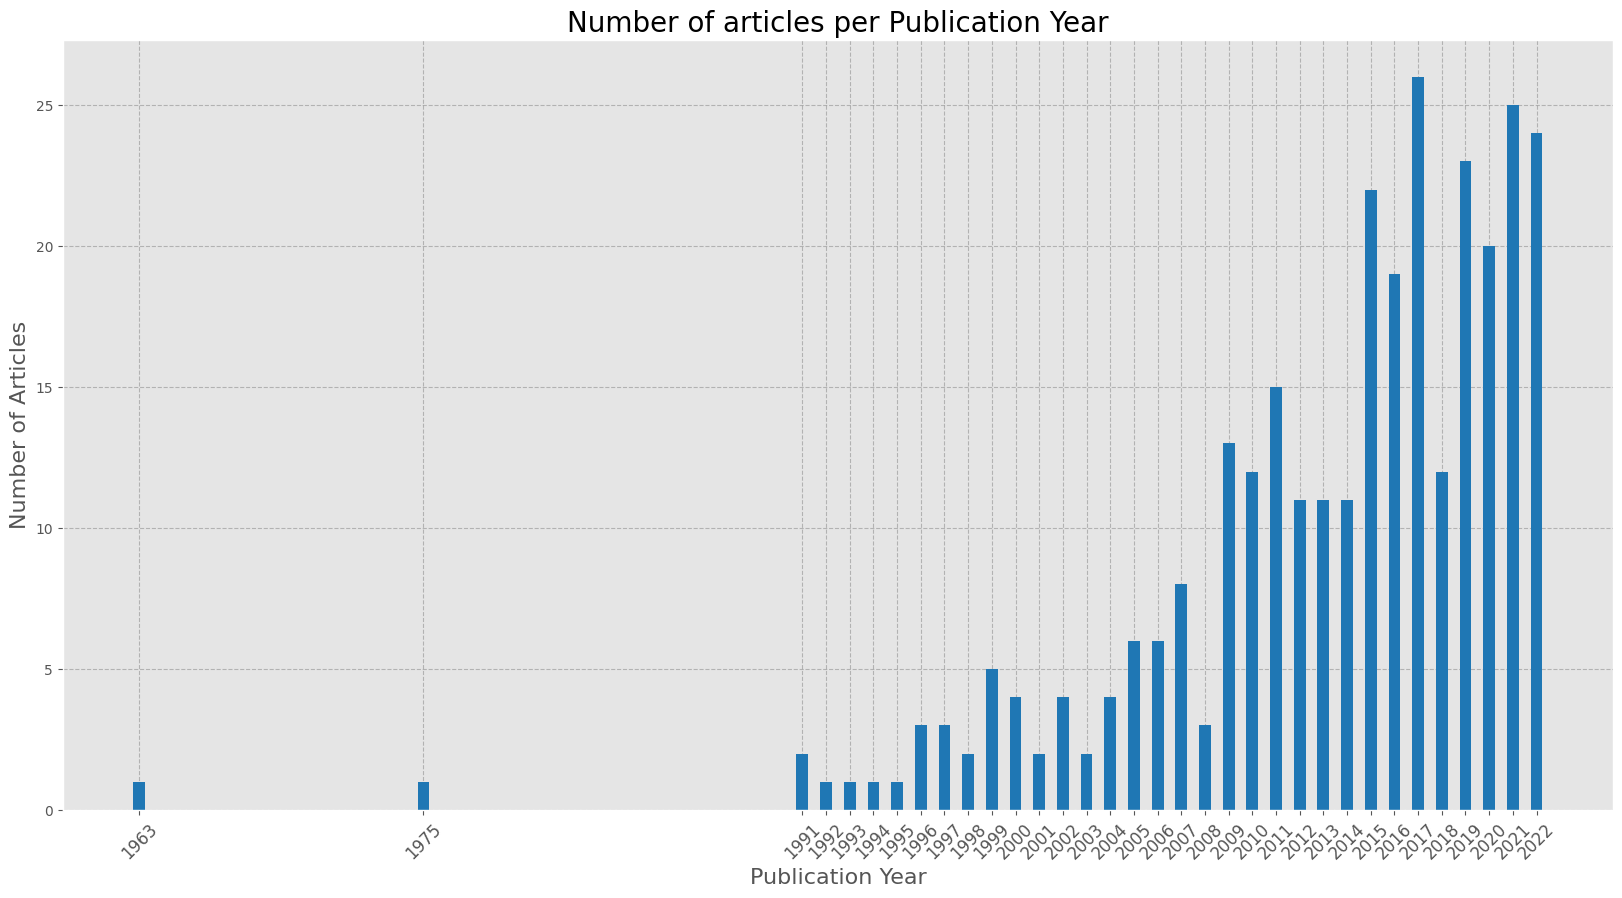

In [2]:
import csv
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('ggplot') # to use different styles for the graph

publication_years = []

with open("C:/Users/abdul/Desktop/workspace/publication.csv", newline='', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        if csv_reader.line_num == 1:
            continue
        publication_year = row[2] # extract the value
        if not publication_year or int(publication_year) < 1963: # check if the value is empty or before 1963
            continue # skip this row
        publication_years.append(int(publication_year))


# use collections.Counter to count the occurrences of each publication year
year_count = Counter(publication_years)

# sort the count by year
year_count = dict(sorted(year_count.items()))

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.bar(list(year_count.keys()), list(year_count.values()), width=0.5, color='#1f77b4')
ax.set_xticks(list(year_count.keys()))
ax.set_xticklabels(list(year_count.keys()), fontsize=12)
ax.set_xlabel("Publication Year", fontsize=16)
ax.set_ylabel("Number of Articles", fontsize=16)
ax.set_title("Number of articles per Publication Year", fontsize=20)
plt.xticks(rotation=45)
ax.grid(True, linestyle='--', color='gray', alpha=0.5)
plt.show()


Wordcloud for Keywords in each article

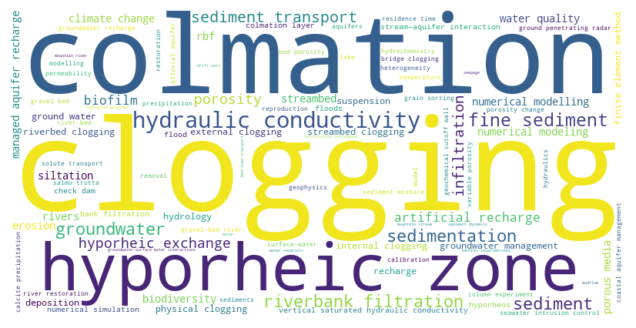

In [1]:
import csv
from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Add any words you want to exclude from the wordcloud to the STOPWORDS set
STOPWORDS.update(["example1", "example2"])

tag_counts = defaultdict(int)
with open('C:/Users/abdul/Desktop/workspace/publication.csv', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        for tag in row['Automatic Tags'].split(';'):
            tag = tag.strip().lower()  # Convert the tag to lowercase
            tag_counts[tag] += 1

# Creating the wordcloud object
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', 
                      width=800, height=400, max_words=100)

wordcloud.generate_from_frequencies(tag_counts)

# Display the generated image
plt.figure(figsize=(8, 4), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


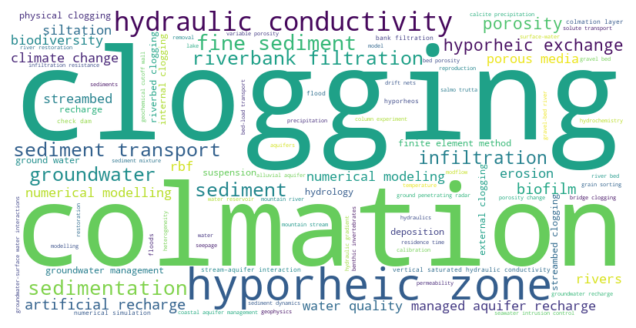

In [3]:
import csv
from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Add any words you want to exclude from the wordcloud to the STOPWORDS set
STOPWORDS.update([ 'clogging', 'colmation', 'Clogging', 'Colmation', 'clogging layer', 'colmation layer', 'hyporheic zone', 'Hyporheic zone'])

tag_counts = defaultdict(int)
with open('C:/Users/abdul/Desktop/workspace/publication.csv', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        for tag in row['Automatic Tags'].split(';'):
            tag = tag.strip().lower()  # Convert the tag to lowercase
            tag_counts[tag] += 1

# Creating the wordcloud object
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', 
                      width=800, height=400, max_words=100)

wordcloud.generate_from_frequencies(tag_counts)

# Display the generated image
plt.figure(figsize=(8, 4), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

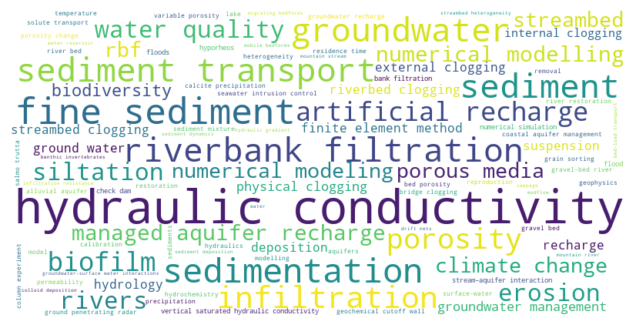

In [6]:
import csv
from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Add any words you want to exclude from the wordcloud to the STOPWORDS set
STOPWORDS.update([ 'clogging', 'colmation', 'Clogging', 'Colmation', 'clogging layer', 'colmation layer', 'hyporheic zone', 'hyporheic exchange'])

tag_counts = defaultdict(int)
with open('C:/Users/abdul/Desktop/workspace/publication.csv', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        for tag in row['Automatic Tags'].split(';'):
            tag = tag.strip().lower()  # Convert the tag to lowercase
            if tag not in STOPWORDS:  # Only count the tag if it's not in the STOPWORDS set
                tag_counts[tag] += 1

# Creating the wordcloud object
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', 
                      width=800, height=400, max_words=100)

wordcloud.generate_from_frequencies(tag_counts)

# Display the generated image
plt.figure(figsize=(8, 4), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


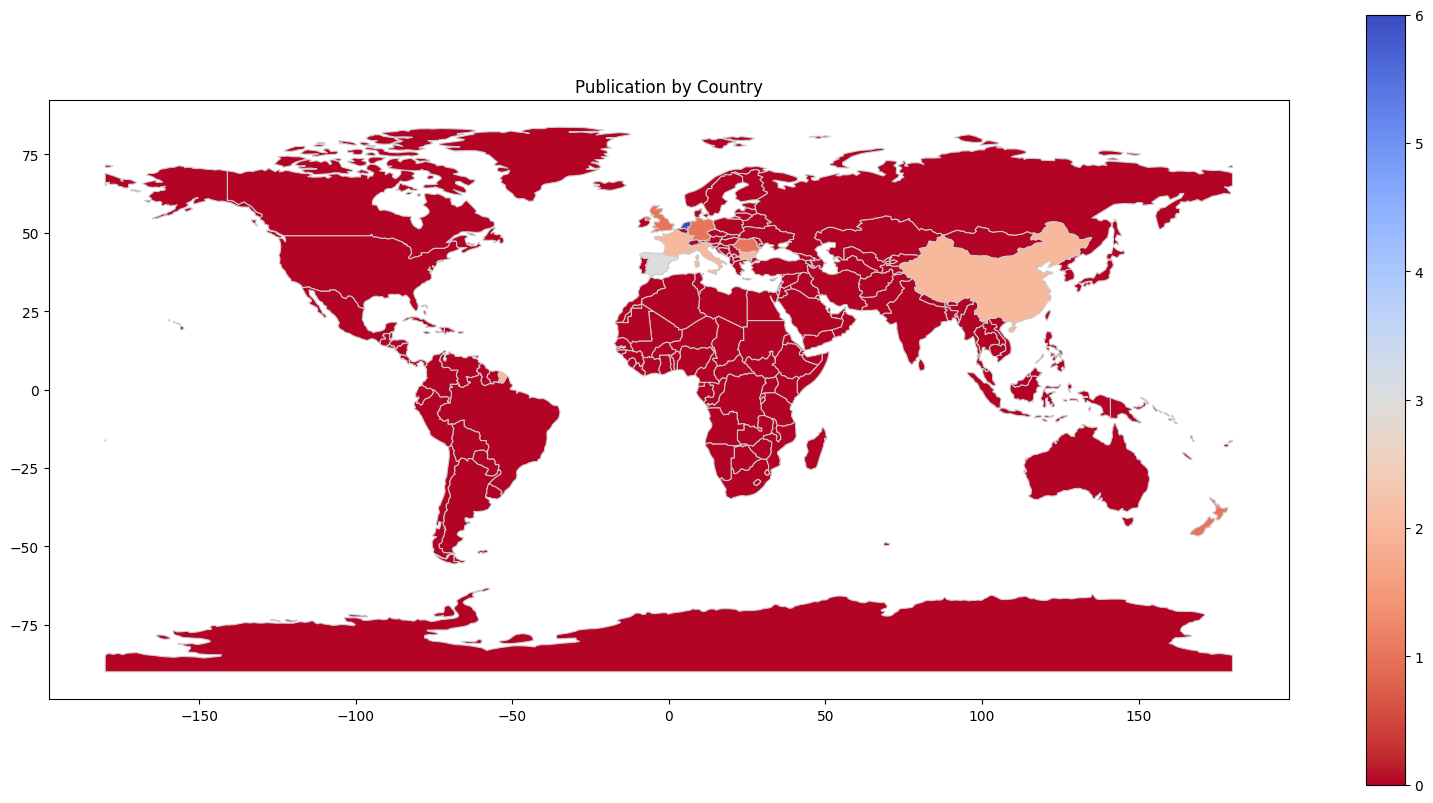

In [5]:
import pandas as pd
import geopandas as gpd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
csv_file = "C:/Users/abdul/Desktop/workspace/publication.csv"
df = pd.read_csv(csv_file)
geolocator = Nominatim(user_agent="myGeocoder", timeout=10)
def get_country(row):
    try:
        if pd.notna(row['Place']):
            location = geolocator.geocode(row['Place'], language="en")
            if location:
                return location.address.split(",")[-1].strip()
        if pd.notna(row['Abstract Note']):
            location = geolocator.geocode(row['Abstract Note'], language="en")
            if location:
                return location.address.split(",")[-1].strip()
    except Exception as e:
        print(f"Error while geocoding: {e}")
    return None

df['Country'] = df.apply(get_country, axis=1)
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_merged = world.merge(country_counts, left_on='name', right_on='Country', how='left')
world_merged['Count'] = world_merged['Count'].fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
world_merged.plot(column='Count', cmap='coolwarm_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'shrink': 0.5})
ax.set_title('Publication by Country')
plt.show()



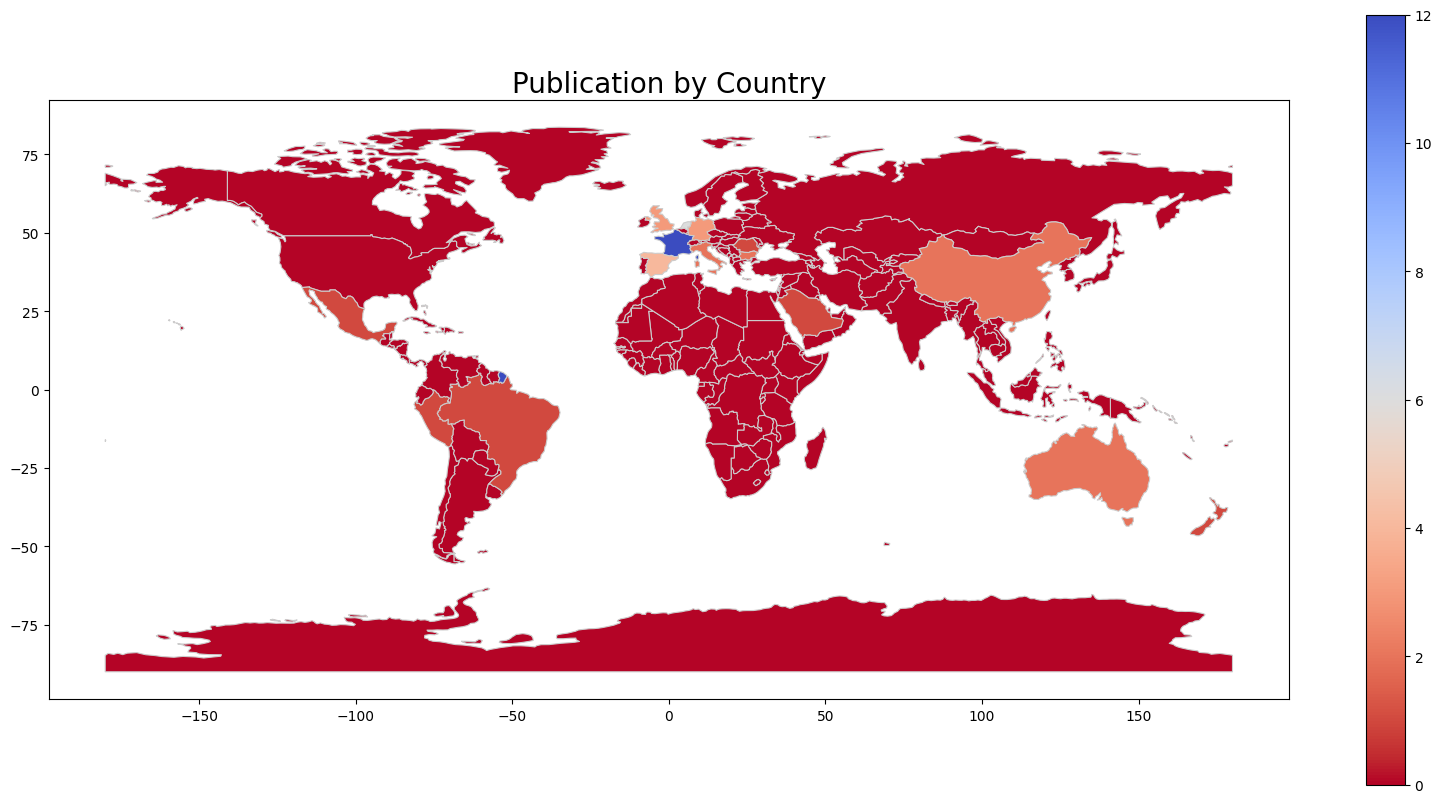

In [6]:
import pandas as pd
import geopandas as gpd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

csv_file = "C:/Users/abdul/Desktop/workspace/publication.csv"
df = pd.read_csv(csv_file)

geolocator = Nominatim(user_agent="myGeocoder", timeout=10)

def get_country(row):
    location_columns = ['Place', 'Abstract Note', 'Publisher', 'Title', 'Manual Tags', 'Automatic Tags', 'Conference Name', 'Meeting Name', 'Archive Location', 'Library Catalog']
    for column in location_columns:
        try:
            if pd.notna(row[column]):
                location = geolocator.geocode(row[column], language="en")
                if location:
                    return location.address.split(",")[-1].strip()
        except Exception as e:
            print(f"Error while geocoding: {e}")
    return None

df['Country'] = df.apply(get_country, axis=1)
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_merged = world.merge(country_counts, left_on='name', right_on='Country', how='left')
world_merged['Count'] = world_merged['Count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
world_merged.plot(column='Count', cmap='coolwarm_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'shrink': 0.5})
ax.set_title('Publication by Country', fontsize=20)
plt.show()
